In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('train_collisions_india.csv')

In [3]:
df.head()


,Year,Month,Day,Location,Casualties,Cause,Weather,Train Speed,Maintenance Status,Signal Error
0,1998,1,27,844,31,Technical Fault,Clear,88.291400,1,1
1,1961,6,23,387,40,Human Error,Clear,46.087071,0,0
2,2018,2,7,506,22,Weather Conditions,Rainy,30.153011,0,1
3,2007,7,15,294,31,Human Error,Stormy,72.348643,0,1
4,1967,9,14,193,28,Technical Fault,Clear,64.646958,0,0


In [10]:
# Check for missing values
print(df.isnull().sum())

Year                  0
Month                 0
Day                   0
Location              0
Casualties            0
Cause                 0
Weather               0
Train Speed           0
Maintenance Status    0
Signal Error          0
dtype: int64


In [5]:
# Drop the rows with missing values
df = df.dropna()

In [6]:
df.describe


<bound method NDFrame.describe of        Year  Month  Day  Location  Casualties               Cause Weather  \
0      1998      1   27       844          31     Technical Fault   Clear   
1      1961      6   23       387          40         Human Error   Clear   
2      2018      2    7       506          22  Weather Conditions   Rainy   
3      2007      7   15       294          31         Human Error  Stormy   
4      1967      9   14       193          28     Technical Fault   Clear   
...     ...    ...  ...       ...         ...                 ...     ...   
99995  1955      6   24       689          26            Sabotage   Clear   
99996  1995      7    7       344          30     Technical Fault   Foggy   
99997  2010      4   15       839          33         Human Error  Stormy   
99998  2023      3   23       192          34     Technical Fault   Clear   
99999  2009      4   10       356          28         Human Error   Rainy   

       Train Speed  Maintenance Status  S

In [7]:
# Check the data types of the columns
df.dtypes


Year                    int64
Month                   int64
Day                     int64
Location                int64
Casualties              int64
Cause                  object
Weather                object
Train Speed           float64
Maintenance Status      int64
Signal Error            int64
dtype: object

In [8]:
df.columns

Index(['Year', 'Month', 'Day', 'Location', 'Casualties', 'Cause', 'Weather',
       'Train Speed', 'Maintenance Status', 'Signal Error'],
      dtype='object')

In [9]:
df.dropna()  # Drop rows with missing values
df.fillna(0)  # Fill missing values with 0

,Year,Month,Day,Location,Casualties,Cause,Weather,Train Speed,Maintenance Status,Signal Error
0,1998,1,27,844,31,Technical Fault,Clear,88.291400,1,1
1,1961,6,23,387,40,Human Error,Clear,46.087071,0,0
2,2018,2,7,506,22,Weather Conditions,Rainy,30.153011,0,1
3,2007,7,15,294,31,Human Error,Stormy,72.348643,0,1
4,1967,9,14,193,28,Technical Fault,Clear,64.646958,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,1955,6,24,689,26,Sabotage,Clear,47.754543,0,0
99996,1995,7,7,344,30,Technical Fault,Foggy,83.067276,0,0
99997,2010,4,15,839,33,Human Error,Stormy,73.376327,0,1
99998,2023,3,23,192,34,Technical Fault,Clear,90.188107,0,0


In [11]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df = df.drop(columns=['Year', 'Month', 'Day'])

ValueError: cannot assemble the datetimes: day is out of range for month, at position 139. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [16]:
def is_valid_date(year, month, day):
    try:
        pd.to_datetime(f'{year}-{month}-{day}')
        return True
    except ValueError:
        return False

invalid_dates = df[~df.apply(lambda row: is_valid_date(row['Year'], row['Month'], row['Day']), axis=1)]
print(len(invalid_dates))


0


In [15]:
import calendar

def correct_date(row):
    year = row['Year']
    month = row['Month']
    day = row['Day']
    
    # Get the last day of the month
    last_day = calendar.monthrange(year, month)[1]
    
    if day > last_day:
        row['Day'] = last_day
        
    return row

df = df.apply(correct_date, axis=1)


In [17]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df = df.drop(columns=['Year', 'Month', 'Day'])

In [19]:
df.head()

,Location,Casualties,Cause,Weather,Train Speed,Maintenance Status,Signal Error,Date
0,844,31,Technical Fault,Clear,88.291400,1,1,1998-01-27
1,387,40,Human Error,Clear,46.087071,0,0,1961-06-23
2,506,22,Weather Conditions,Rainy,30.153011,0,1,2018-02-07
3,294,31,Human Error,Stormy,72.348643,0,1,2007-07-15
4,193,28,Technical Fault,Clear,64.646958,0,0,1967-09-14


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Location            100000 non-null  int64         
 1   Casualties          100000 non-null  int64         
 2   Cause               100000 non-null  object        
 3   Weather             100000 non-null  object        
 4   Train Speed         100000 non-null  float64       
 5   Maintenance Status  100000 non-null  int64         
 6   Signal Error        100000 non-null  int64         
 7   Date                100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 6.1+ MB


In [22]:
# Convert categorical columns to category type
categorical_columns = ['Location', 'Cause', 'Weather', 'Maintenance Status', 'Signal Error']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [23]:
# Handle missing values by dropping rows with any missing values
df = df.dropna()

# Check for duplicates and drop them
df = df.drop_duplicates()

# Reset index after cleaning
df = df.reset_index(drop=True)

# Verify the cleaned data
print(df.info())
print(df.head())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Location            100000 non-null  category      
 1   Casualties          100000 non-null  int64         
 2   Cause               100000 non-null  category      
 3   Weather             100000 non-null  category      
 4   Train Speed         100000 non-null  float64       
 5   Maintenance Status  100000 non-null  category      
 6   Signal Error        100000 non-null  category      
 7   Date                100000 non-null  datetime64[ns]
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 2.9 MB
None
  Location  Casualties               Cause Weather  Train Speed  \
0      844          31     Technical Fault   Clear    88.291400   
1      387          40         Human Error   Clear    46.087071   
2      506          22  Weather C

In [28]:
print(df.describe(include='all'))

        Location     Casualties        Cause Weather    Train Speed  \
count   100000.0  100000.000000       100000  100000  100000.000000   
unique    1000.0            NaN            5       4            NaN   
top        432.0            NaN  Human Error   Clear            NaN   
freq       139.0            NaN        50005   60016            NaN   
mean         NaN      30.019810          NaN     NaN      59.888758   
min          NaN       8.000000          NaN     NaN       0.000000   
25%          NaN      26.000000          NaN     NaN      46.347893   
50%          NaN      30.000000          NaN     NaN      59.873922   
75%          NaN      33.000000          NaN     NaN      73.402404   
max          NaN      57.000000          NaN     NaN     142.020408   
std          NaN       5.184611          NaN     NaN      19.957946   

        Maintenance Status  Signal Error                        Date  
count             100000.0      100000.0                      100000  
uniqu

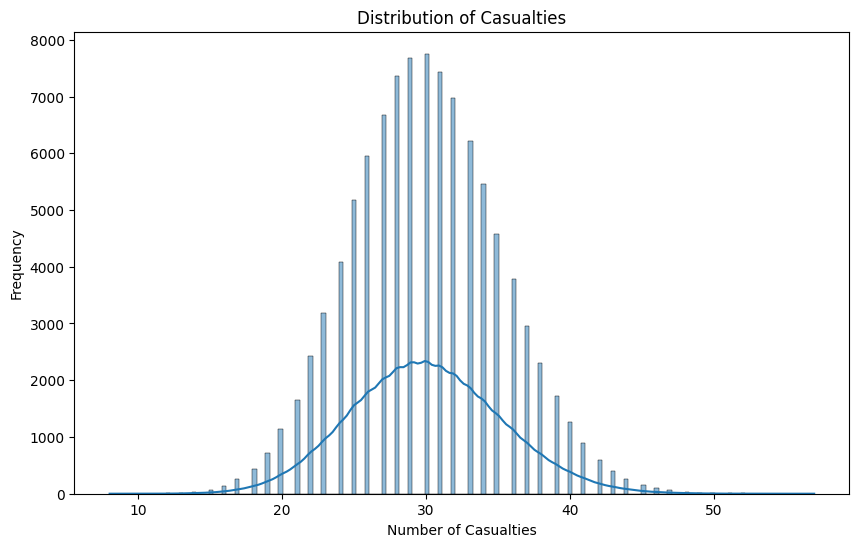

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Casualties'], kde=True)
plt.title('Distribution of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.show()


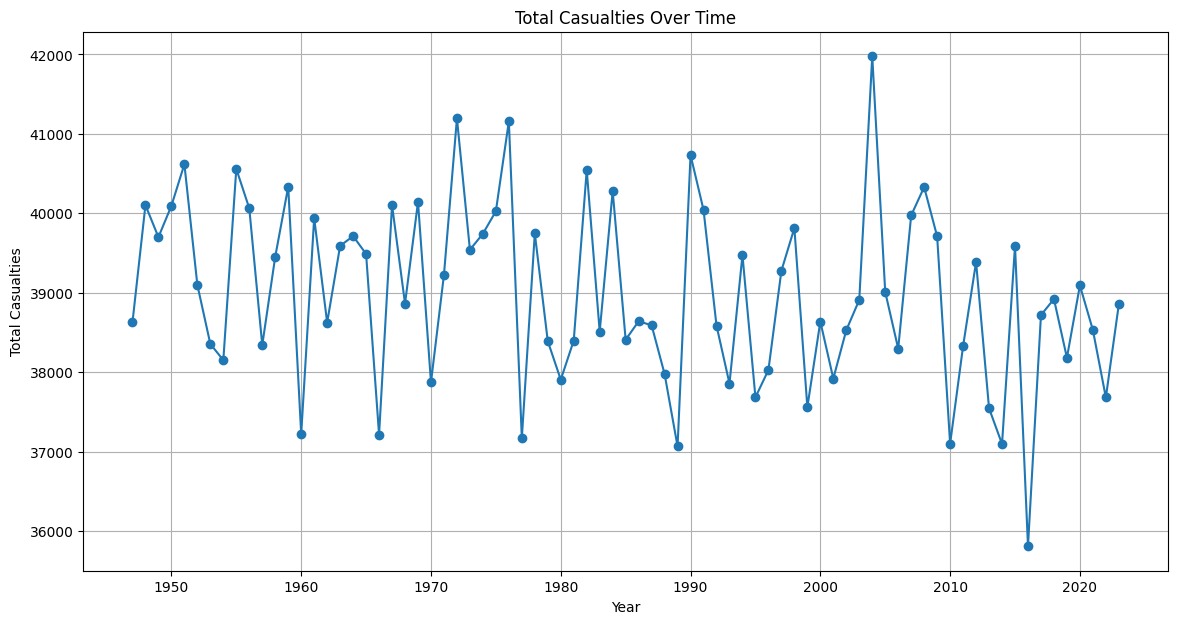

In [49]:
df['Year'] = df['Date'].dt.year
yearly_casualties = df.groupby('Year')['Casualties'].sum()

plt.figure(figsize=(14, 7))
yearly_casualties.plot(kind='line', marker='o')
plt.title('Total Casualties Over Time')
plt.xlabel('Year')
plt.ylabel('Total Casualties')
plt.grid(True)
plt.show()


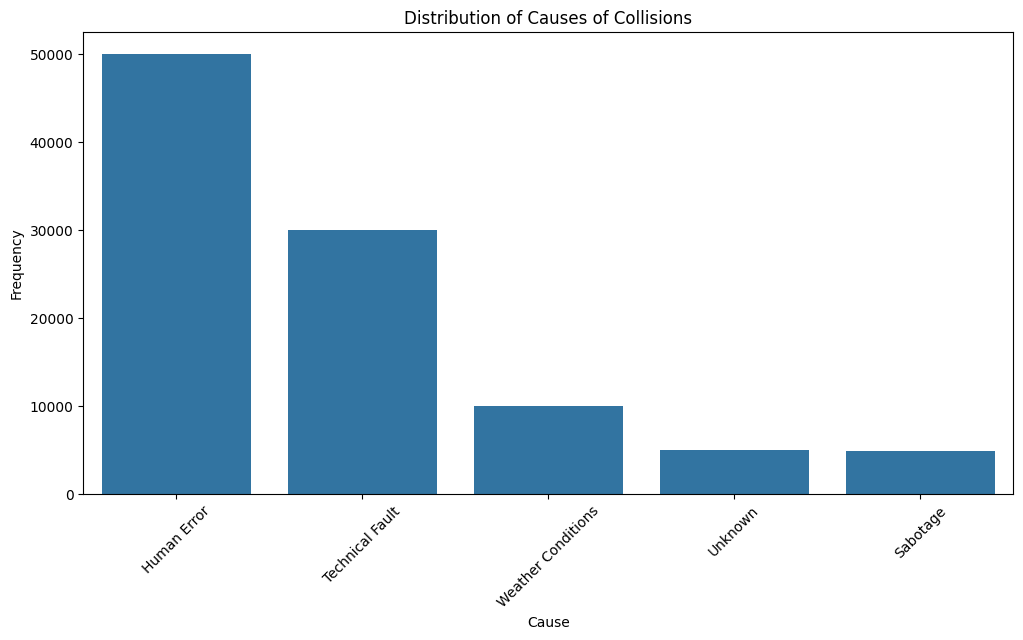

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Cause', order=df['Cause'].value_counts().index)
plt.title('Distribution of Causes of Collisions')
plt.xlabel('Cause')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


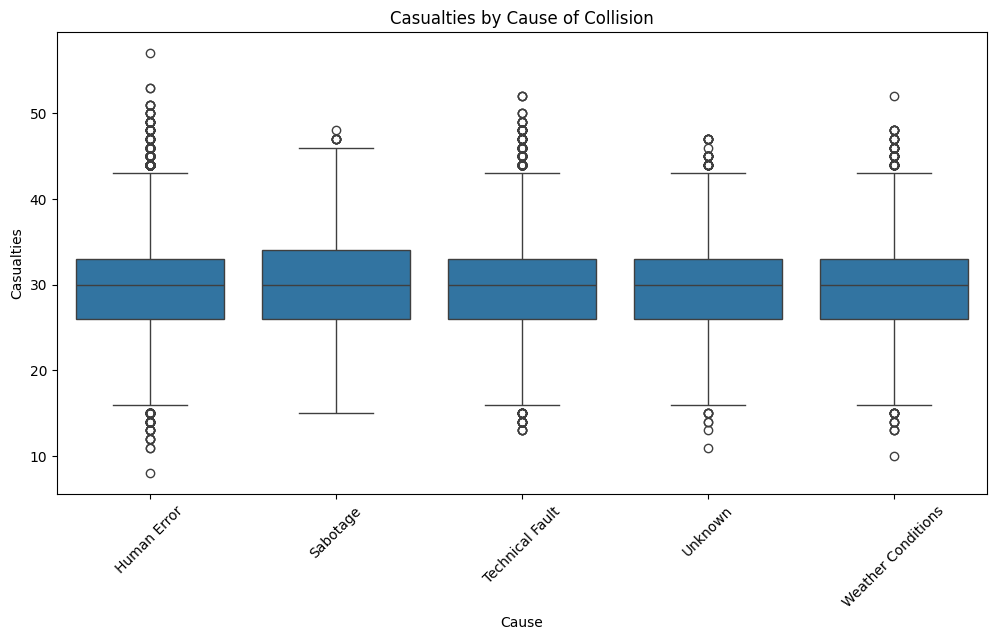

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Cause', y='Casualties')
plt.title('Casualties by Cause of Collision')
plt.xlabel('Cause')
plt.ylabel('Casualties')
plt.xticks(rotation=45)
plt.show()

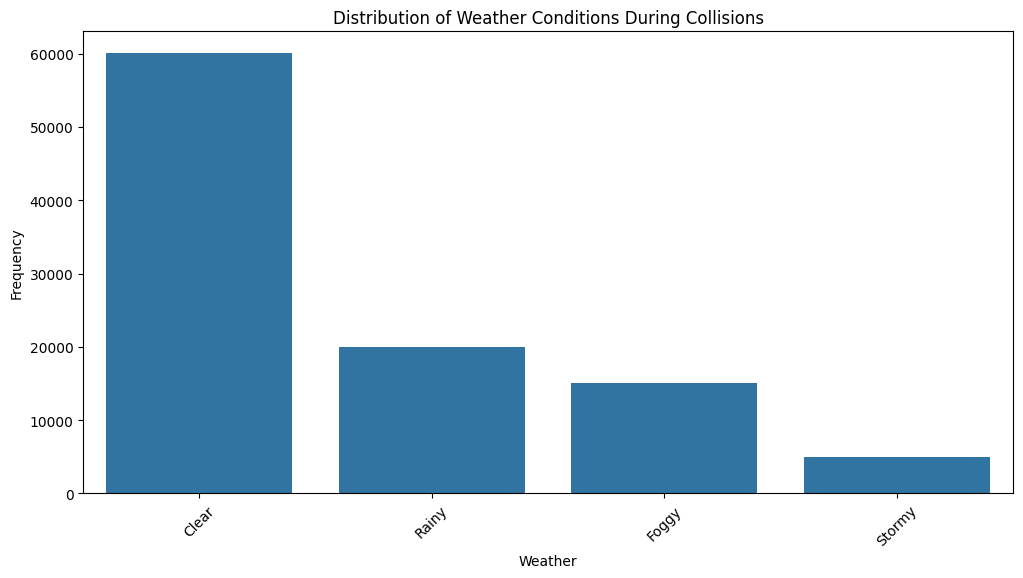

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Weather', order=df['Weather'].value_counts().index)
plt.title('Distribution of Weather Conditions During Collisions')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


C:\Users\karth\AppData\Local\Temp\ipykernel_1548\1023802922.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  casualties_pivot = df.pivot_table(values='Casualties', index='Cause', columns='Weather', aggfunc='mean')


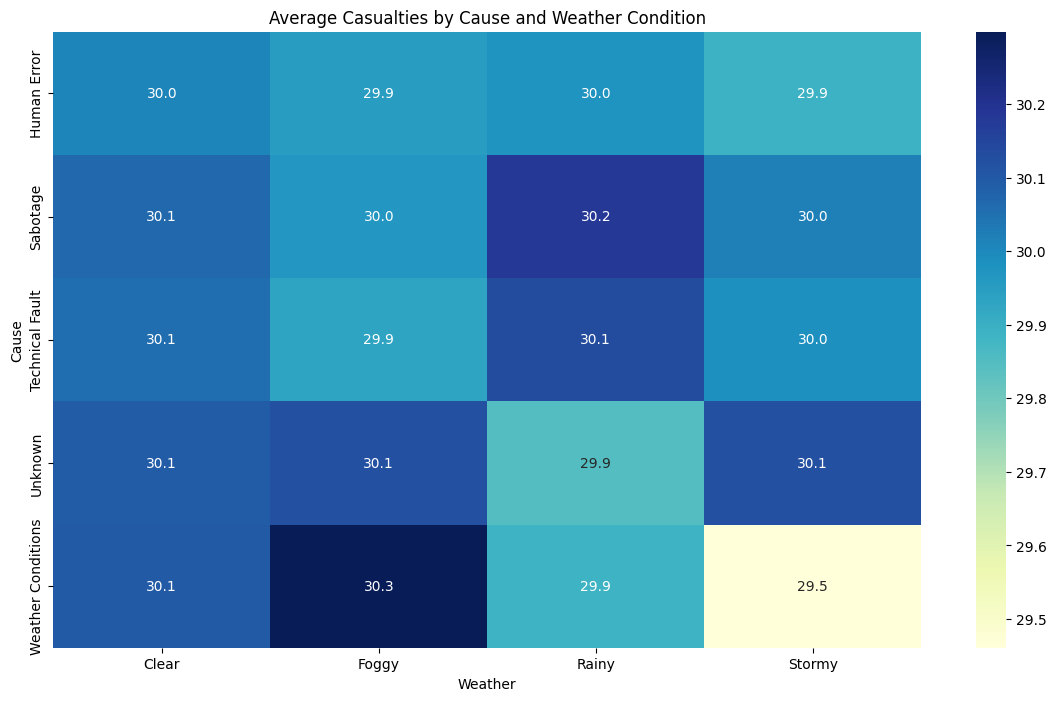

In [44]:
plt.figure(figsize=(14, 8))
casualties_pivot = df.pivot_table(values='Casualties', index='Cause', columns='Weather', aggfunc='mean')
sns.heatmap(casualties_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Casualties by Cause and Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Cause')
plt.show()


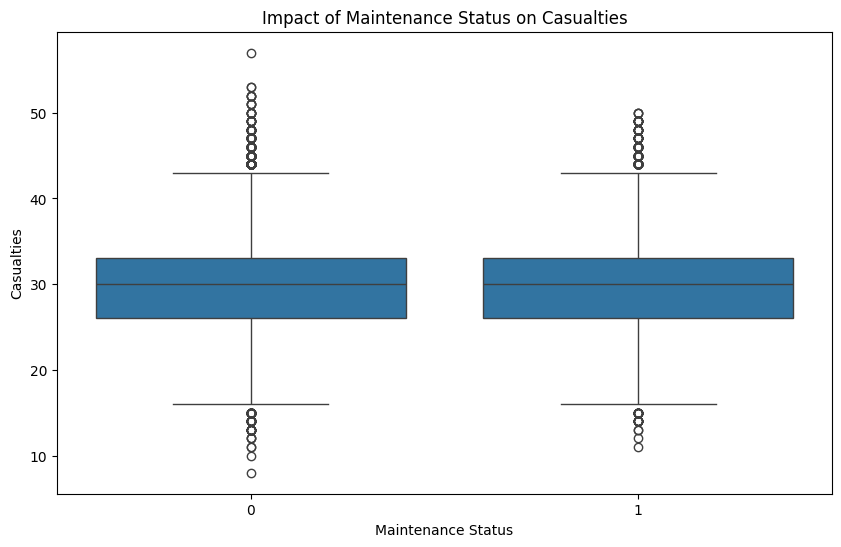

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Maintenance Status', y='Casualties')
plt.title('Impact of Maintenance Status on Casualties')
plt.xlabel('Maintenance Status')
plt.ylabel('Casualties')
plt.show()


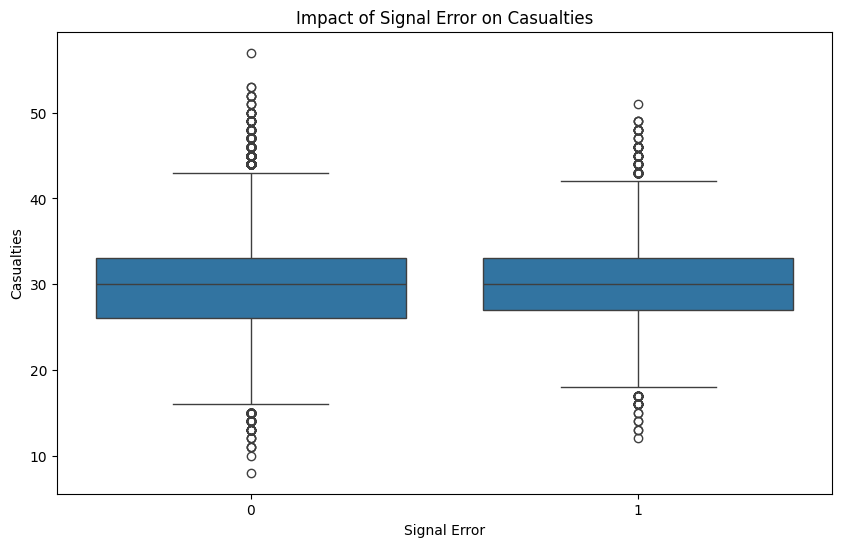

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Signal Error', y='Casualties')
plt.title('Impact of Signal Error on Casualties')
plt.xlabel('Signal Error')
plt.ylabel('Casualties')
plt.show()


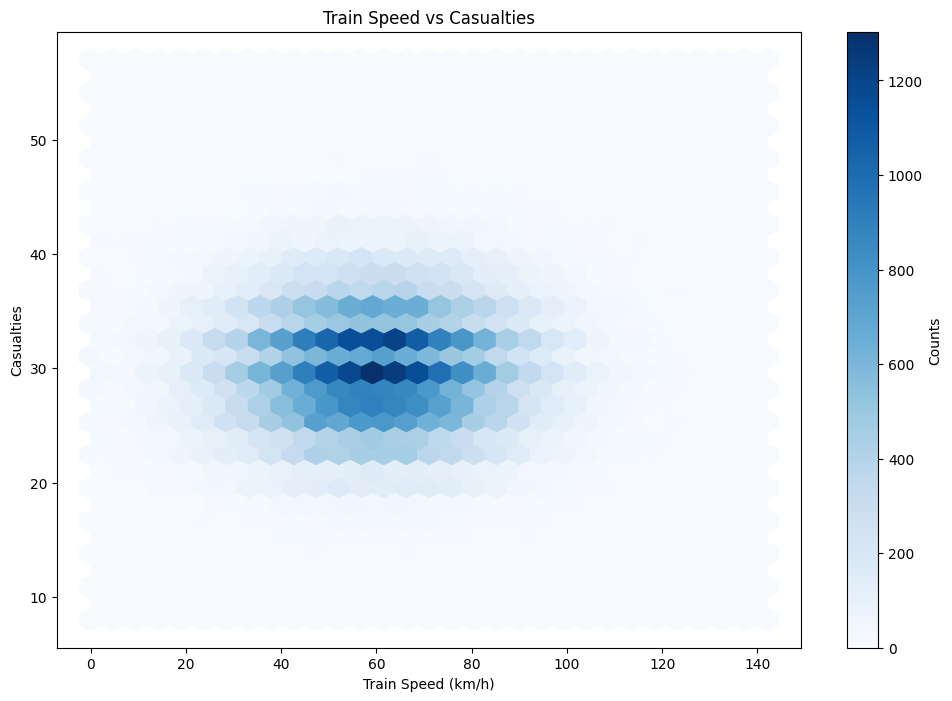

In [51]:
plt.figure(figsize=(12, 8))
plt.hexbin(df['Train Speed'], df['Casualties'], gridsize=30, cmap='Blues')
plt.colorbar(label='Counts')
plt.title('Train Speed vs Casualties')
plt.xlabel('Train Speed (km/h)')
plt.ylabel('Casualties')
plt.show()

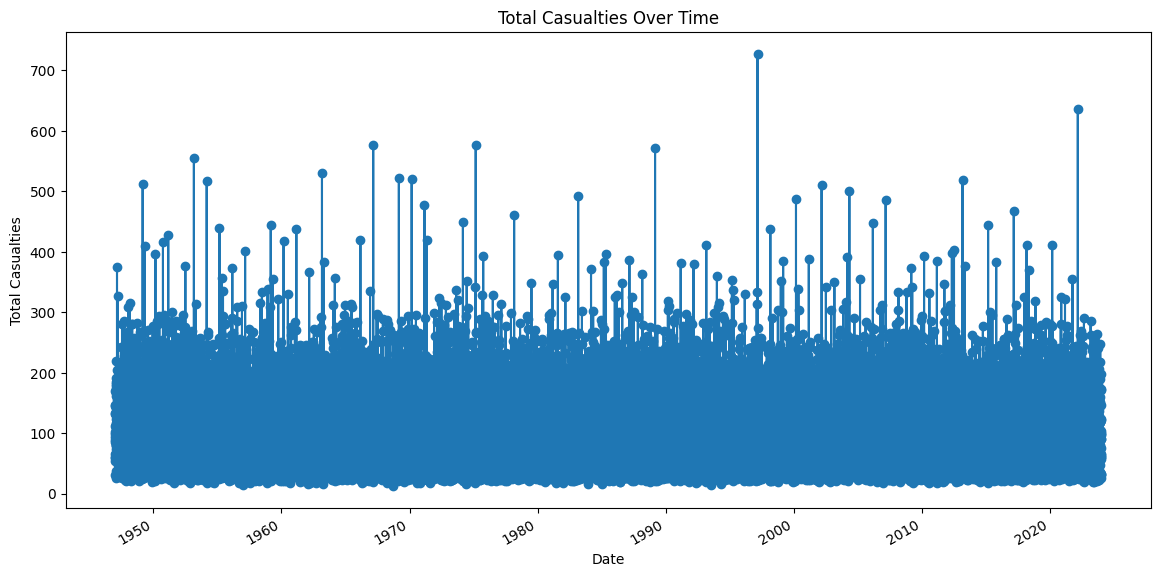

In [47]:
plt.figure(figsize=(14, 7))
df.groupby('Date')['Casualties'].sum().plot(marker='o', linestyle='-')
plt.title('Total Casualties Over Time')
plt.xlabel('Date')
plt.ylabel('Total Casualties')
plt.show()


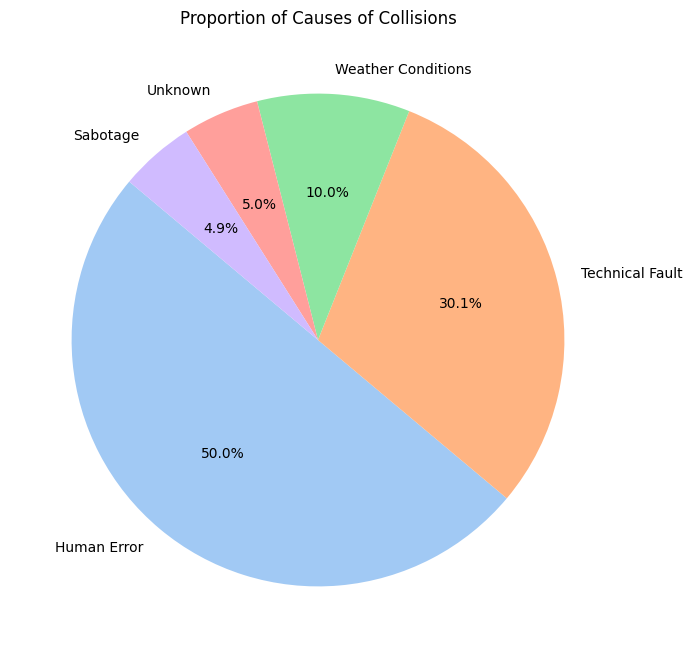

In [48]:
plt.figure(figsize=(10, 8))
df['Cause'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Causes of Collisions')
plt.ylabel('')
plt.show()
